<a href="https://colab.research.google.com/github/MaliheDahmardeh/ZB/blob/main/ZB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT DATA

In [1]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('zobele-GC.xlsx', sheet_name=None)  # Use sheet_name=None to read all sheets

print(df)

{'FORNO Nuovo Vs. Vecchio':             Date  number  peso spirale umida  peso spirale secca  \
0      8.10.2024       1                52.8                 NaN   
1      8.10.2024       2                51.4                 NaN   
2      8.10.2024       3                51.5                 NaN   
3      8.10.2024       4                53.0                 NaN   
4      8.10.2024       5                51.5                 NaN   
...          ...     ...                 ...                 ...   
1126  04.12.2024    1127                 NaN               24.68   
1127  04.12.2024    1128                 NaN               24.70   
1128  04.12.2024    1129                 NaN               24.54   
1129  04.12.2024    1130                 NaN               24.46   
1130  04.12.2024    1131                 NaN               24.53   

      Numero del forno    forno posizione nel carrello: T/C/B  \
0                    4  vecchio                             B   
1                    4  v

In [2]:
# Display the names of the sheets
print(df.keys())

dict_keys(['FORNO Nuovo Vs. Vecchio', 'Sheet1', 'principi attivi'])


In [3]:
# Load data from the sheet 'FORNO Nuovo Vs. Vecchio'
data = df['FORNO Nuovo Vs. Vecchio']

# Display the first few rows
print(data.head())

        Date  number  peso spirale umida  peso spirale secca  \
0  8.10.2024       1                52.8                 NaN   
1  8.10.2024       2                51.4                 NaN   
2  8.10.2024       3                51.5                 NaN   
3  8.10.2024       4                53.0                 NaN   
4  8.10.2024       5                51.5                 NaN   

   Numero del forno    forno posizione nel carrello: T/C/B  \
0                 4  vecchio                             B   
1                 4  vecchio                             B   
2                 4  vecchio                             B   
3                 4  vecchio                             B   
4                 4  vecchio                             C   

  posizione nel forno: RB/RF/LB/LF/CF/C  % ETOC  numero di esperimento  \
0                                    RF     NaN                      1   
1                                    RF     NaN                      1   
2                   

In [4]:
# Display the column names in the DataFrame
print(data.columns)

Index(['Date', 'number', 'peso spirale umida', 'peso spirale secca',
       'Numero del forno', 'forno', 'posizione nel carrello: T/C/B',
       'posizione nel forno: RB/RF/LB/LF/CF/C', '% ETOC',
       'numero di esperimento', 'numero di carello',
       'orario di tempo di attesa', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


In [5]:
# Calculate mean and standard deviation for wet and dry spirals by oven
summary = data.groupby('Numero del forno')[['peso spirale umida', 'peso spirale secca']].agg(['mean', 'std'])

# Rename columns for clarity
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Display the summary statistics
print(summary)


                  peso spirale umida_mean  peso spirale umida_std  \
Numero del forno                                                    
2                               50.534643                1.027674   
3                               50.482500                1.695516   
4                               51.258333                1.166532   

                  peso spirale secca_mean  peso spirale secca_std  
Numero del forno                                                   
2                               23.230000                0.674130  
3                               24.230189                1.033446  
4                               24.387745                0.816997  


In [6]:
# Clean column names
data.columns = data.columns.str.strip()

# Display the first few rows to verify
print(data.head())

        Date  number  peso spirale umida  peso spirale secca  \
0  8.10.2024       1                52.8                 NaN   
1  8.10.2024       2                51.4                 NaN   
2  8.10.2024       3                51.5                 NaN   
3  8.10.2024       4                53.0                 NaN   
4  8.10.2024       5                51.5                 NaN   

   Numero del forno    forno posizione nel carrello: T/C/B  \
0                 4  vecchio                             B   
1                 4  vecchio                             B   
2                 4  vecchio                             B   
3                 4  vecchio                             B   
4                 4  vecchio                             C   

  posizione nel forno: RB/RF/LB/LF/CF/C  % ETOC  numero di esperimento  \
0                                    RF     NaN                      1   
1                                    RF     NaN                      1   
2                   

In [7]:
# Group data by oven type and position, calculate mean and std for wet and dry spiral weights
summary = data.groupby(['forno', 'posizione nel carrello: T/C/B'])[['peso spirale umida', 'peso spirale secca']].agg(['mean', 'std'])

# Rename columns for clarity
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Display the summary statistics
print(summary)


                                       peso spirale umida_mean  \
forno   posizione nel carrello: T/C/B                            
nuovo   B                                            51.216667   
        C                                            51.375000   
        T                                            50.833333   
vecchio B                                            50.458333   
        C                                            51.118542   
        T                                            49.541111   

                                       peso spirale umida_std  \
forno   posizione nel carrello: T/C/B                           
nuovo   B                                            0.668558   
        C                                            0.584847   
        T                                            0.841355   
vecchio B                                            1.550635   
        C                                            0.957379   
        T       

In [8]:
data = {
    ('forno', ''): ['nuovo', 'nuovo', 'nuovo', 'vecchio', 'vecchio', 'vecchio'],
    ('posizione nel carrello: T/C/B', ''): ['B', 'C', 'T', 'B', 'C', 'T'],
    ('peso spirale umida', 'mean'): [51.216667, 51.375000, 50.833333, 50.458333, 50.950000, 51.083333],
    ('peso spirale umida', 'std'): [0.668558, 0.584847, 0.841355, 1.550635, 1.537117, 0.805474],
    ('peso spirale secca', 'mean'): [23.981579, 23.914035, 23.451351, 23.991228, 24.080531, 23.455102],
    ('peso spirale secca', 'std'): [1.498764, 0.887661, 0.833597, 1.006577, 0.930712, 0.966034]
}

# Create a summary DataFrame
summary = pd.DataFrame(data)

# Display the summary DataFrame in a nice format
from IPython.display import display

# Show the summary DataFrame
display(summary)

forno posizione nel carrello: T/C/B peso spirale umida            \
                                                       mean       std   
0    nuovo                             B          51.216667  0.668558   
1    nuovo                             C          51.375000  0.584847   
2    nuovo                             T          50.833333  0.841355   
3  vecchio                             B          50.458333  1.550635   
4  vecchio                             C          50.950000  1.537117   
5  vecchio                             T          51.083333  0.805474   

  peso spirale secca            
                mean       std  
0          23.981579  1.498764  
1          23.914035  0.887661  
2          23.451351  0.833597  
3          23.991228  1.006577  
4          24.080531  0.930712  
5          23.455102  0.966034

<Figure size 1400x800 with 0 Axes>

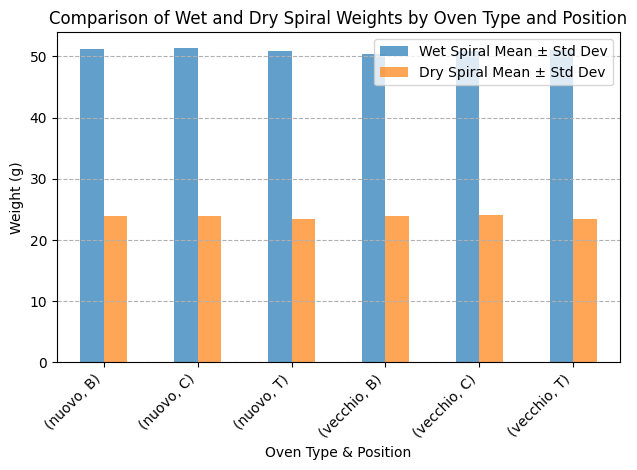

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 8))

# Creating bar plots for mean values with error bars for standard deviation
summary[['peso spirale umida_mean', 'peso spirale secca_mean']].plot(
    kind='bar',
    yerr=summary[['peso spirale umida_std', 'peso spirale secca_std']],
    capsize=4,
    alpha=0.7
)

plt.title('Comparison of Wet and Dry Spiral Weights by Oven Type and Position')
plt.xlabel('Oven Type & Position')
plt.ylabel('Weight (g)')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.legend(['Wet Spiral Mean ± Std Dev', 'Dry Spiral Mean ± Std Dev'])
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust the plot for better layout
plt.show()


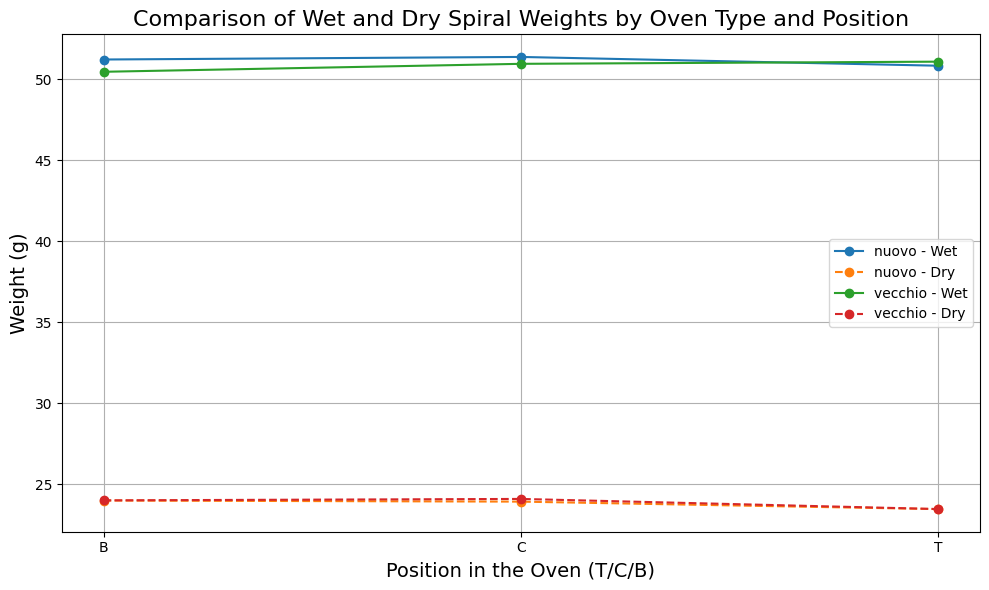

In [ ]:
import matplotlib.pyplot as plt

# Reset index to make plotting easier
summary.reset_index(inplace=True)

# Set the plot style
plt.figure(figsize=(10,6))

# Plotting the mean values for wet and dry spirals
for oven in summary['forno'].unique():
    oven_data = summary[summary['forno'] == oven]
    plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale umida_mean'], marker='o', label=f'{oven} - Wet', linestyle='-')
    plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale secca_mean'], marker='o', label=f'{oven} - Dry', linestyle='--')

# Adding titles and labels
plt.title('Comparison of Wet and Dry Spiral Weights by Oven Type and Position', fontsize=16)
plt.xlabel('Position in the Oven (T/C/B)', fontsize=14)
plt.ylabel('Weight (g)', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
# Group data by experiment number, oven type, and position
summary = df.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B'])[['peso spirale umida', 'peso spirale secca']].agg(['mean', 'std'])

# Rename columns for clarity
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Display the summary statistics
print(summary)



                                                             peso spirale umida_mean  \
numero di esperimento forno   posizione nel carrello: T/C/B                            
1                     nuovo   B                                               51.375   
                              C                                               51.550   
                              T                                               51.575   
                      vecchio B                                               52.175   
                              C                                               51.225   
                              T                                               51.100   
2                     nuovo   B                                               50.825   
                              C                                               50.800   
                              T                                               50.875   
                      vecchio B 

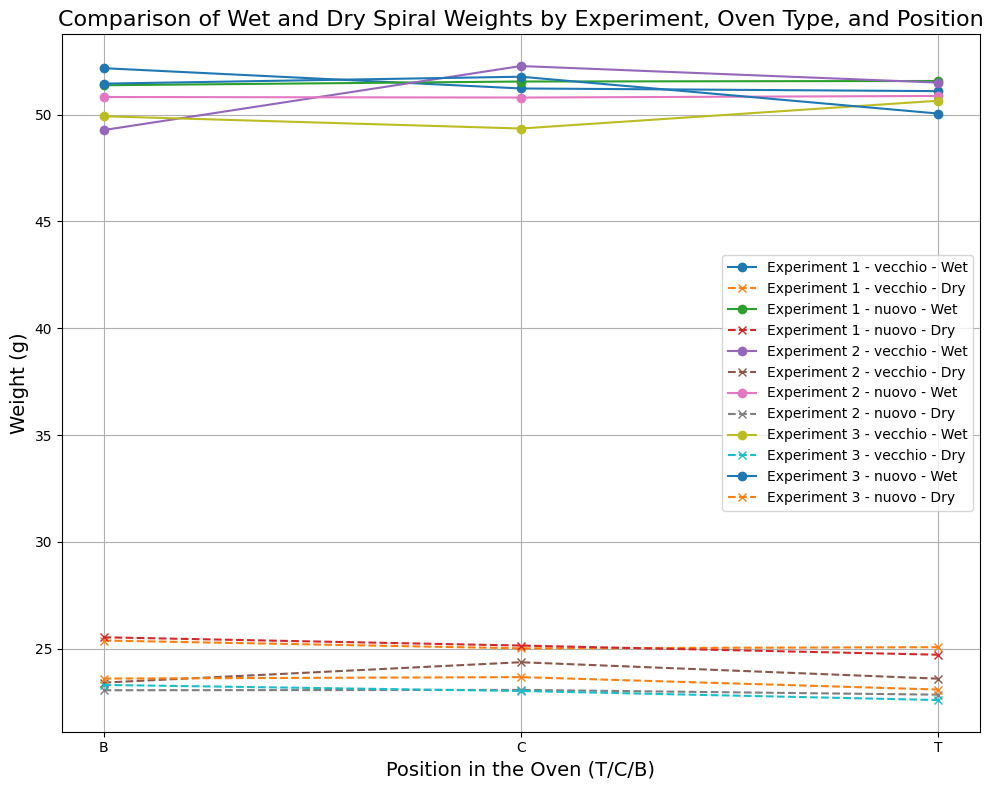

In [ ]:
import matplotlib.pyplot as plt

# Reset index for easier plotting
summary.reset_index(inplace=True)

# Set the plot style
plt.figure(figsize=(10, 8))

# Plotting the mean values for each experiment across ovens and positions
experiments = summary['numero di esperimento'].unique()
positions = summary['posizione nel carrello: T/C/B'].unique()

for experiment in experiments:
    experiment_data = summary[summary['numero di esperimento'] == experiment]

    # Plot wet and dry spiral weights for each oven and position
    for oven in ['vecchio', 'nuovo']:
        oven_data = experiment_data[experiment_data['forno'] == oven]

        # Plot wet spirals
        plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale umida_mean'], marker='o', label=f'Experiment {experiment} - {oven} - Wet', linestyle='-')

        # Plot dry spirals
        plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale secca_mean'], marker='x', label=f'Experiment {experiment} - {oven} - Dry', linestyle='--')

# Adding titles and labels
plt.title('Comparison of Wet and Dry Spiral Weights by Experiment, Oven Type, and Position', fontsize=16)
plt.xlabel('Position in the Oven (T/C/B)', fontsize=14)
plt.ylabel('Weight (g)', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


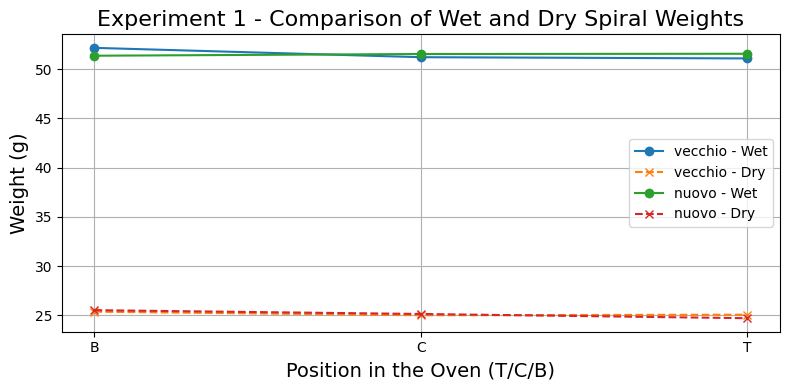

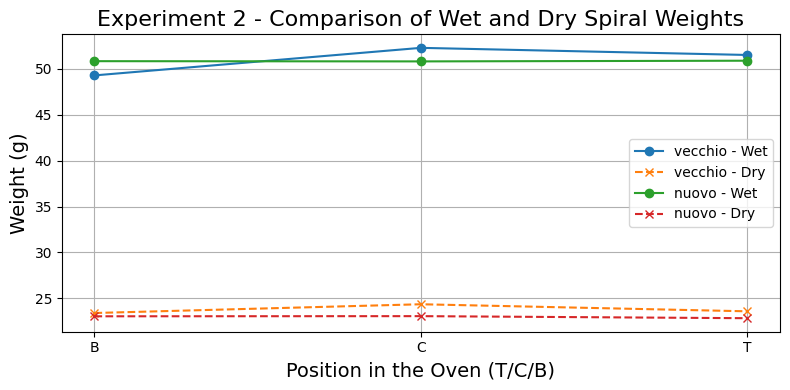

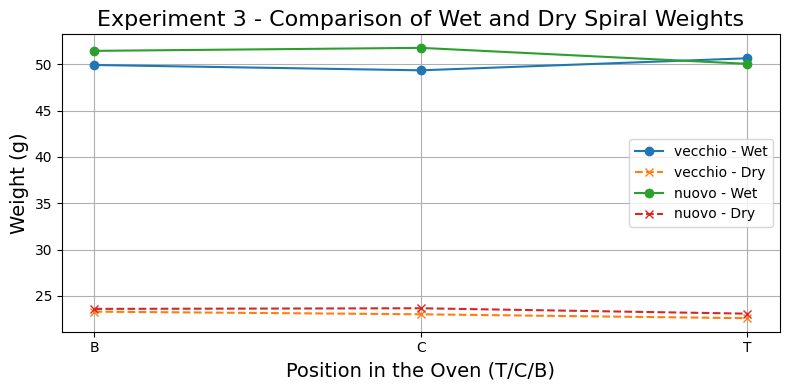

In [ ]:
import matplotlib.pyplot as plt

# Get unique experiments
experiments = summary['numero di esperimento'].unique()

# Create a separate plot for each experiment
for experiment in experiments:
    plt.figure(figsize=(8, 4))  # Create a new figure for each experiment

    # Filter data for the current experiment
    experiment_data = summary[summary['numero di esperimento'] == experiment]

    # Plot wet and dry spiral weights for each oven type and position
    for oven in ['vecchio', 'nuovo']:
        oven_data = experiment_data[experiment_data['forno'] == oven]

        # Plot wet spirals
        plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale umida_mean'], marker='o', label=f'{oven} - Wet', linestyle='-')

        # Plot dry spirals
        plt.plot(oven_data['posizione nel carrello: T/C/B'], oven_data['peso spirale secca_mean'], marker='x', label=f'{oven} - Dry', linestyle='--')

    # Adding titles and labels
    plt.title(f'Experiment {experiment} - Comparison of Wet and Dry Spiral Weights', fontsize=16)
    plt.xlabel('Position in the Oven (T/C/B)', fontsize=14)
    plt.ylabel('Weight (g)', fontsize=14)
    plt.xticks(rotation=0)  # Rotate x-ticks for better readability
    plt.legend()
    plt.grid()

    # Show the plot for the current experiment
    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()


**Summary of Results**


In [ ]:
data = {
    ('numero di esperimento', ''): [1, 1, 1, 1, 1, 1,
                                     2, 2, 2, 2, 2, 2,
                                     3, 3, 3, 3, 3, 3],
    ('forno', ''): ['nuovo']*3 + ['vecchio']*3 + ['nuovo']*3 + ['vecchio']*3 + ['nuovo']*3 + ['vecchio']*3,
    ('posizione nel carrello: T/C/B', ''): ['B', 'C', 'T', 'B', 'C', 'T']*3,
    ('peso spirale umida', 'mean'): [51.375, 51.550, 51.575, 52.175, 51.225, 51.100,
                                     50.825, 50.800, 50.875, 49.275, 52.275, 51.500,
                                     51.450, 51.775, 50.050, 49.925, 49.350, 50.650],
    ('peso spirale umida', 'std'): [0.189297, 0.191485, 0.309570, 0.842120, 0.377492, 0.336650,
                                    0.221736, 0.374166, 0.170783, 0.613052, 1.078193, 0.270801,
                                    1.115049, 0.618466, 0.957427, 1.247330, 1.226105, 1.307670],
    ('peso spirale secca', 'mean'): [25.529412, 25.142857, 24.712903, 25.377778, 25.011765, 25.066667,
                                     23.050000, 23.066667, 22.842500, 23.408108, 24.361538, 23.592500,
                                     23.597500, 23.665000, 23.082500, 23.300000, 23.015000, 22.592500],
    ('peso spirale secca', 'std'): [0.160547, 0.091670, 0.131001, 0.282955, 0.226655, 0.272246,
                                    1.784980, 0.245307, 0.172296, 0.310357, 0.420911, 0.220009,
                                    0.412924, 0.283341, 0.363662, 0.413521, 0.521610, 0.509090],
}

# Creating the summary DataFrame
summary = pd.DataFrame(data)
summary.index.name = 'Index'

# Resetting the index to make the DataFrame easier to read
summary.reset_index(drop=True, inplace=True)

# Displaying the summary DataFrame in a nice format
from IPython.display import display

display(summary)

numero di esperimento    forno posizione nel carrello: T/C/B  \
                                                                  
0                      1    nuovo                             B   
1                      1    nuovo                             C   
2                      1    nuovo                             T   
3                      1  vecchio                             B   
4                      1  vecchio                             C   
5                      1  vecchio                             T   
6                      2    nuovo                             B   
7                      2    nuovo                             C   
8                      2    nuovo                             T   
9                      2  vecchio                             B   
10                     2  vecchio                             C   
11                     2  vecchio                             T   
12                     3    nuovo                             B   
13                     3    nuovo                             C   
14                     3    nuovo                             T   
15                     3  vecchio                             B   
16                     3  vecchio                             C   
17                     3  vecchio                             T   

   peso spirale umida           peso spirale secca            
                 mean       std               mean       std  
0              51.375  0.189297          25.529412  0.160547  
1              51.550  0.191485          25.142857  0.091670  
2              51.575  0.309570          24.712903  0.131001  
3              52.175  0.842120          25.377778  0.282955  
4              51.225  0.377492          25.011765  0.226655  
5              51.100  0.336650          25.066667  0.272246  
6              50.825  0.221736          23.050000  1.784980  
7              50.800  0.374166          23.066667  0.245307  
8              50.875  0.170783          22.842500  0.172296  
9              49.275  0.613052          23.408108  0.310357  
10             52.275  1.078193          24.361538  0.420911  
11             51.500  0.270801          23.592500  0.220009  
12             51.450  1.115049          23.597500  0.412924  
13             51.775  0.618466          23.665000  0.283341  
14             50.050  0.957427          23.082500  0.363662  
15             49.925  1.247330          23.300000  0.413521  
16             49.350  1.226105          23.015000  0.521610  
17             50.650  1.307670          22.592500  0.509090

In [ ]:
df.columns = df.columns.str.strip()

# Check data types
print(df.dtypes)

# For columns that might contain commas:
# Replace commas with dots and convert to numeric only if necessary
if df['peso spirale umida'].dtype == 'object':
    df['peso spirale umida'] = pd.to_numeric(df['peso spirale umida'].str.replace(',', '.'), errors='coerce')

if df['peso spirale secca'].dtype == 'object':
    df['peso spirale secca'] = pd.to_numeric(df['peso spirale secca'].str.replace(',', '.'), errors='coerce')  # Adjust if column exists

# Group by experiment number, oven type, and position
summary_extent = df.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B'])[['peso spirale umida', 'peso spirale secca']].agg(['max', 'min'])

# Rename columns for clarity
summary_extent.columns = ['_'.join(col).strip() for col in summary_extent.columns.values]

# Reset index for better formatting
summary_extent.reset_index(inplace=True)

# Display the summary DataFrame with max and min values
from IPython.display import display

# Show the summary DataFrame
display(summary_extent)

Date                                 object
NaN                                   int64
peso spirale umida                  float64
peso spirale secca                  float64
Numero del forno                      int64
forno                                object
posizione nel carrello: T/C/B        object
posizione nel forno: RB/RF/LB/LF     object
% ETOC                              float64
numero di esperimento                 int64
numero di carello                     int64
dtype: object


,numero di esperimento,forno,posizione nel carrello: T/C/B,peso spirale umida_max,peso spirale umida_min,peso spirale secca_max,peso spirale secca_min
0,1,nuovo,B,51.5,51.1,25.9,25.2
1,1,nuovo,C,51.8,51.4,25.3,25.0
2,1,nuovo,T,52.0,51.3,25.0,24.5
3,1,vecchio,B,53.0,51.4,25.8,25.0
4,1,vecchio,C,51.6,50.9,25.5,24.6
5,1,vecchio,T,51.5,50.7,25.8,24.7
6,2,nuovo,B,51.1,50.6,23.7,12.1
7,2,nuovo,C,51.3,50.4,23.5,22.7
8,2,nuovo,T,51.1,50.7,23.2,22.5
9,2,vecchio,B,49.9,48.7,24.2,23.0


the weight of wet spirals should be between 22-24 and the weight of dried spirals should be between 52-54

**Analysis**

**Wet Spiral Comparison:**

**Experiment 1:**The wet spiral weights for the new oven (average of ~51.5 g) are slightly lower than the old oven (average of ~51.5 g), indicating that the old oven produced slightly heavier wet spirals in this experiment.

**Experiment 2:**The new oven's weights decreased, averaging ~50.6 g, while the old oven's weights varied significantly, particularly with C being the highest at 52.275 g.

**Experiment 3:**The new oven produced an average of ~51.1 g versus approximately 49.9 g from the old oven, showing that for this experiment, the new oven provided better results.


**Dry Spiral Comparison:**

**Experiment 1:**The dry weights are comparable between the ovens. The new oven produced slightly lighter dry spirals compared to the old oven, especially at position C.

**Experiment 2:**The new oven had a substantial drop in weight (average ~23.0 g) compared to the old oven (23.4 g – 24.4 g), suggesting a consistent pattern of lower dry weights.

**Experiment 3:**The new oven yielded dry spirals similar in weight to the old oven, with averages of ~23.6 g for the new versus ~23.3 g for the old.

**Standard Deviation Analysis:**

The standard deviation for the wet spiral weights demonstrates variability across different positions and ovens.
For example, in Experiment 2, the new oven's wet spiral weight has a higher standard deviation, particularly in position C (std = 1.078), indicating more variability in those measurements.
The dry spiral standard deviation often shows less variation between ovens compared to the wet spirals, suggesting more consistent results for the dry weights.

In [9]:
# Load data from the sheet 'FORNO Nuovo Vs. Vecchio'
data = df['FORNO Nuovo Vs. Vecchio']

# Display the first few rows
print(data.head())

        Date  number  peso spirale umida  peso spirale secca  \
0  8.10.2024       1                52.8                 NaN   
1  8.10.2024       2                51.4                 NaN   
2  8.10.2024       3                51.5                 NaN   
3  8.10.2024       4                53.0                 NaN   
4  8.10.2024       5                51.5                 NaN   

   Numero del forno    forno posizione nel carrello: T/C/B  \
0                 4  vecchio                             B   
1                 4  vecchio                             B   
2                 4  vecchio                             B   
3                 4  vecchio                             B   
4                 4  vecchio                             C   

  posizione nel forno: RB/RF/LB/LF/CF/C  % ETOC  numero di esperimento  \
0                                    RF     NaN                      1   
1                                    RF     NaN                      1   
2                   

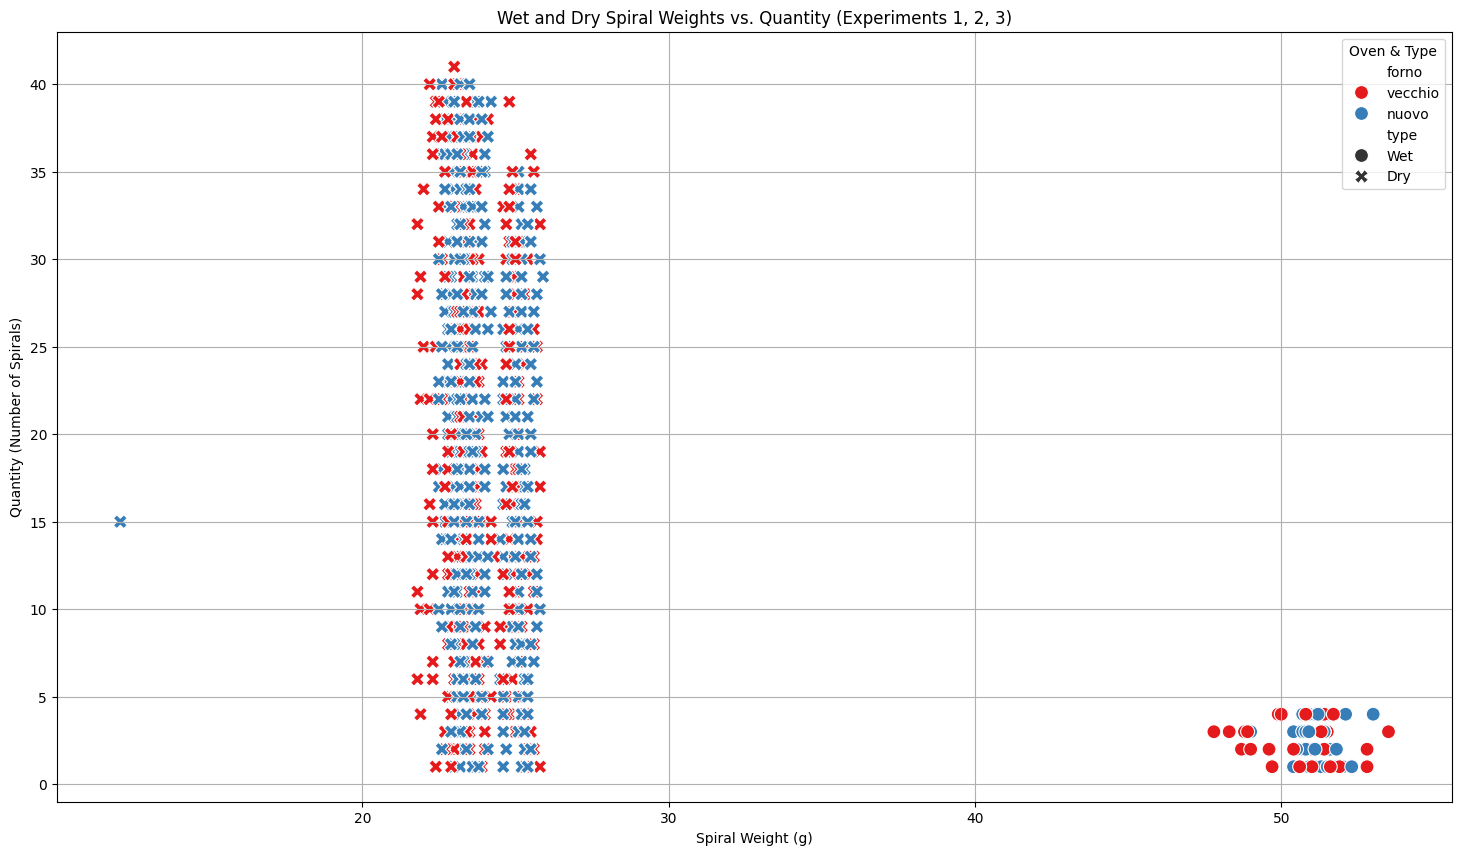

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for experiments 1, 2, and 3
experiments_filtered = data[data['numero di esperimento'].isin([1, 2, 3])]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale umida']]
dry_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale secca']]

# Drop NaN values
wet_data = wet_data.dropna(subset=['peso spirale umida'])
dry_data = dry_data.dropna(subset=['peso spirale secca'])

# Add a "spiral count" column (if this is needed for counting the rows)
wet_data['quantity'] = wet_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1
dry_data['quantity'] = dry_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1

# Combine wet and dry data into one DataFrame for plotting
wet_data['type'] = 'Wet'
dry_data['type'] = 'Dry'
combined_data = pd.concat([wet_data.rename(columns={'peso spirale umida': 'weight'}),
                           dry_data.rename(columns={'peso spirale secca': 'weight'})])

# Scatter plot with weight on x-axis and quantity on y-axis
plt.figure(figsize=(18, 10))
sns.scatterplot(
    data=combined_data,
    x='weight',
    y='quantity',
    hue='forno',
    style='type',
    palette='Set1',
    s=100
)

plt.title("Wet and Dry Spiral Weights vs. Quantity (Experiments 1, 2, 3)")
plt.xlabel("Spiral Weight (g)")
plt.ylabel("Quantity (Number of Spirals)")
plt.legend(title="Oven & Type")
plt.grid(True)
plt.show()

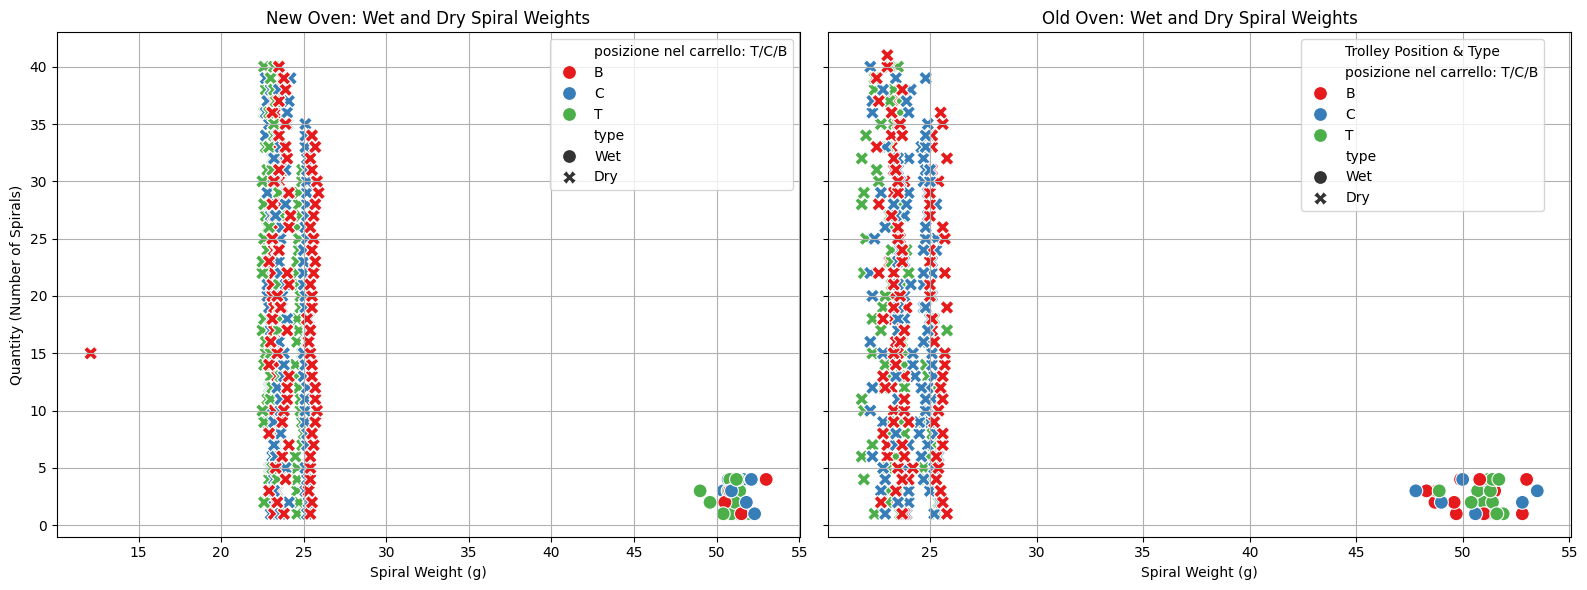

In [11]:
# Split data by oven type
new_oven_data = combined_data[combined_data['forno'] == 'nuovo']
old_oven_data = combined_data[combined_data['forno'] == 'vecchio']

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# New oven plot
sns.scatterplot(
    data=new_oven_data,
    x='weight',
    y='quantity',
    hue='posizione nel carrello: T/C/B',
    style='type',
    ax=axes[0],
    palette='Set1',
    s=100
)
axes[0].set_title('New Oven: Wet and Dry Spiral Weights')
axes[0].set_xlabel('Spiral Weight (g)')
axes[0].set_ylabel('Quantity (Number of Spirals)')
axes[0].grid(True)

# Old oven plot
sns.scatterplot(
    data=old_oven_data,
    x='weight',
    y='quantity',
    hue='posizione nel carrello: T/C/B',
    style='type',
    ax=axes[1],
    palette='Set1',
    s=100
)
axes[1].set_title('Old Oven: Wet and Dry Spiral Weights')
axes[1].set_xlabel('Spiral Weight (g)')
axes[1].set_ylabel('')  # Remove redundant label for cleaner display
axes[1].grid(True)

# Adjust layout and display
plt.legend(title="Trolley Position & Type", loc='upper center', bbox_to_anchor=(0.8, 1), ncol=1)
plt.tight_layout()
plt.show()

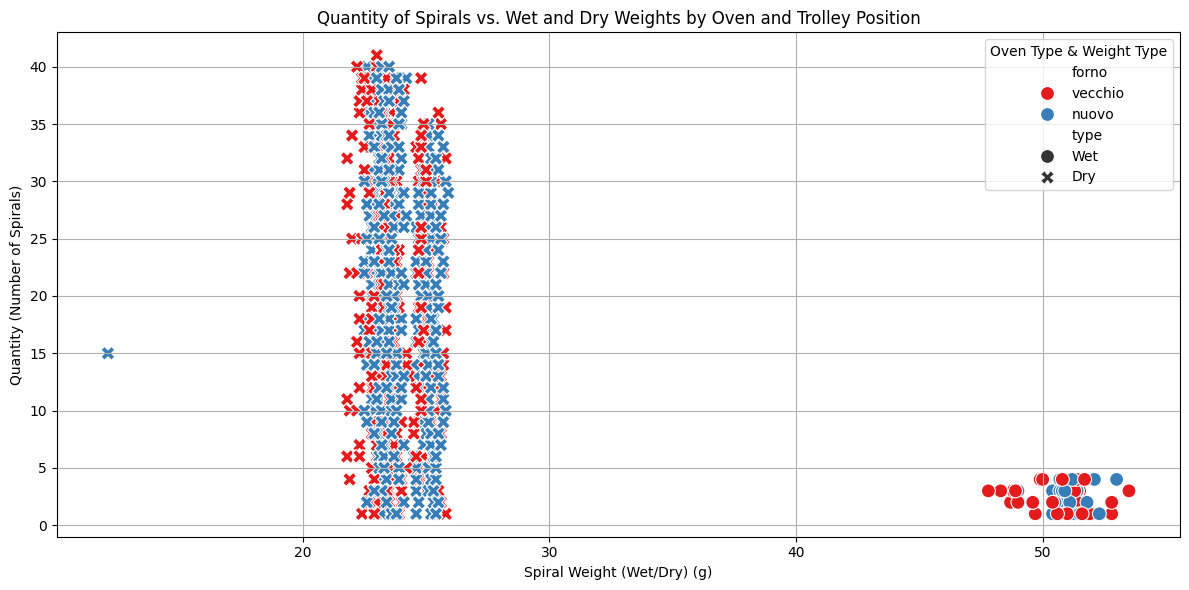

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for experiments 1, 2, and 3
experiments_filtered = data[data['numero di esperimento'].isin([1, 2, 3])]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale umida']]
dry_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale secca']]

# Drop NaN values
wet_data = wet_data.dropna(subset=['peso spirale umida'])
dry_data = dry_data.dropna(subset=['peso spirale secca'])

# Add a "spiral count" column (to track quantity of spirals)
wet_data['quantity'] = wet_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1
dry_data['quantity'] = dry_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1

# Add identifiers for wet and dry weights
wet_data['type'] = 'Wet'
wet_data = wet_data.rename(columns={'peso spirale umida': 'weight'})
dry_data['type'] = 'Dry'
dry_data = dry_data.rename(columns={'peso spirale secca': 'weight'})

# Combine wet and dry data into one DataFrame for plotting
combined_data = pd.concat([wet_data, dry_data])

# Scatter plot with wet and dry weights on x-axis and spiral quantity on y-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=combined_data,
    x='weight',
    y='quantity',
    hue='forno',  # Color for oven type
    style='type',  # Marker style for wet/dry
    palette='Set1',
    s=100
)
plt.title("Quantity of Spirals vs. Wet and Dry Weights by Oven and Trolley Position")
plt.xlabel("Spiral Weight (Wet/Dry) (g)")
plt.ylabel("Quantity (Number of Spirals)")
plt.legend(title="Oven Type & Weight Type")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-13-56652056d2d0>:36: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
<ipython-input-13-56652056d2d0>:36: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
<ipython-input-13-56652056d2d0>:36: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


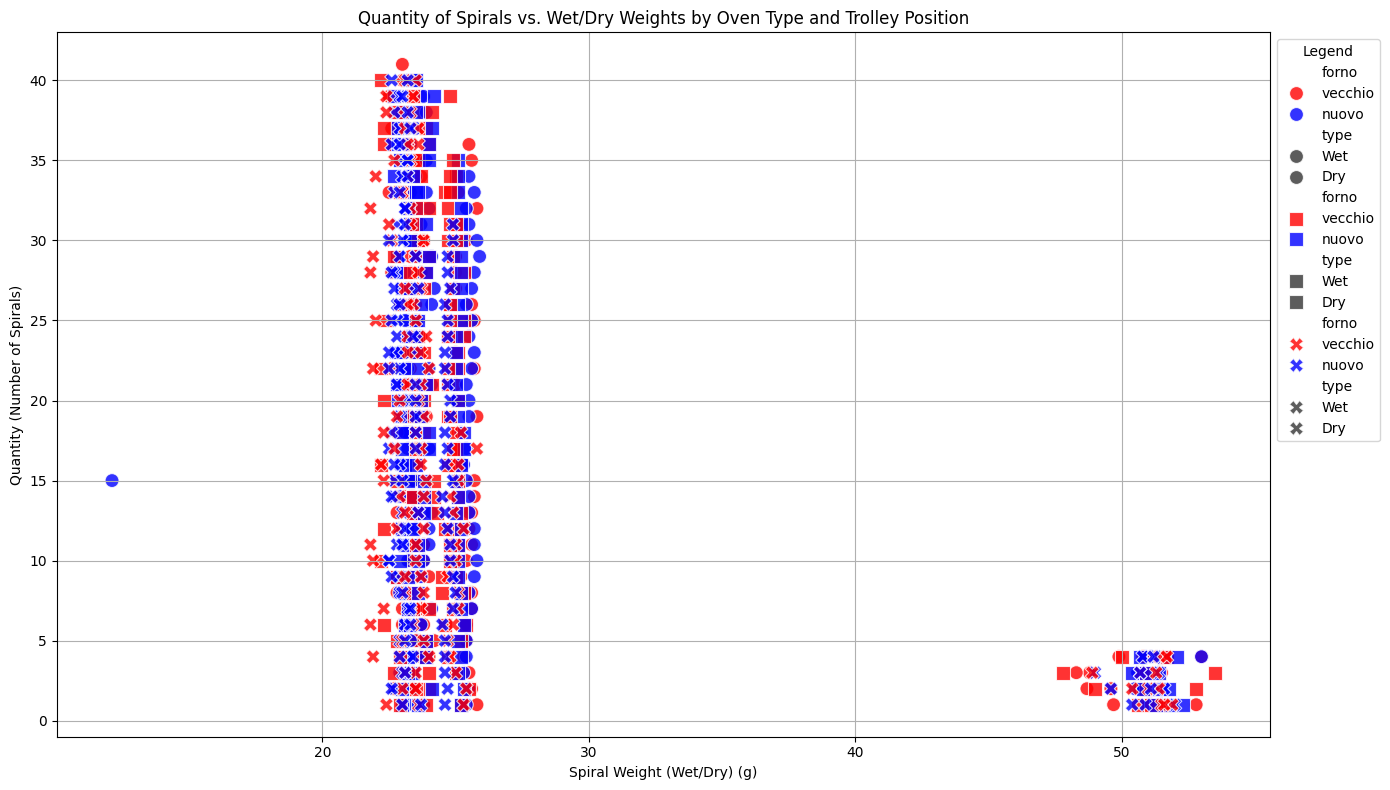

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for experiments 1, 2, and 3
experiments_filtered = data[data['numero di esperimento'].isin([1, 2, 3])]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale umida']]
dry_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale secca']]

# Drop NaN values
wet_data = wet_data.dropna(subset=['peso spirale umida'])
dry_data = dry_data.dropna(subset=['peso spirale secca'])

# Add a "spiral count" column (to track quantity of spirals)
wet_data['quantity'] = wet_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1
dry_data['quantity'] = dry_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).cumcount() + 1

# Add identifiers for wet and dry weights
wet_data['type'] = 'Wet'
wet_data = wet_data.rename(columns={'peso spirale umida': 'weight'})
dry_data['type'] = 'Dry'
dry_data = dry_data.rename(columns={'peso spirale secca': 'weight'})

# Combine wet and dry data into one DataFrame for plotting
combined_data = pd.concat([wet_data, dry_data])

# Define marker styles for trolley positions
marker_styles = {'B': 'o', 'C': 's', 'T': 'X'}

# Create the plot
plt.figure(figsize=(14, 8))
for position, marker in marker_styles.items():
    sns.scatterplot(
        data=combined_data[combined_data['posizione nel carrello: T/C/B'] == position],
        x='weight',
        y='quantity',
        hue='forno',
        style='type',
        palette={'vecchio': 'red', 'nuovo': 'blue'},
        markers=marker,
        s=100,
        legend='full',
        alpha=0.8
    )

# Customize the plot
plt.title("Quantity of Spirals vs. Wet/Dry Weights by Oven Type and Trolley Position")
plt.xlabel("Spiral Weight (Wet/Dry) (g)")
plt.ylabel("Quantity (Number of Spirals)")
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


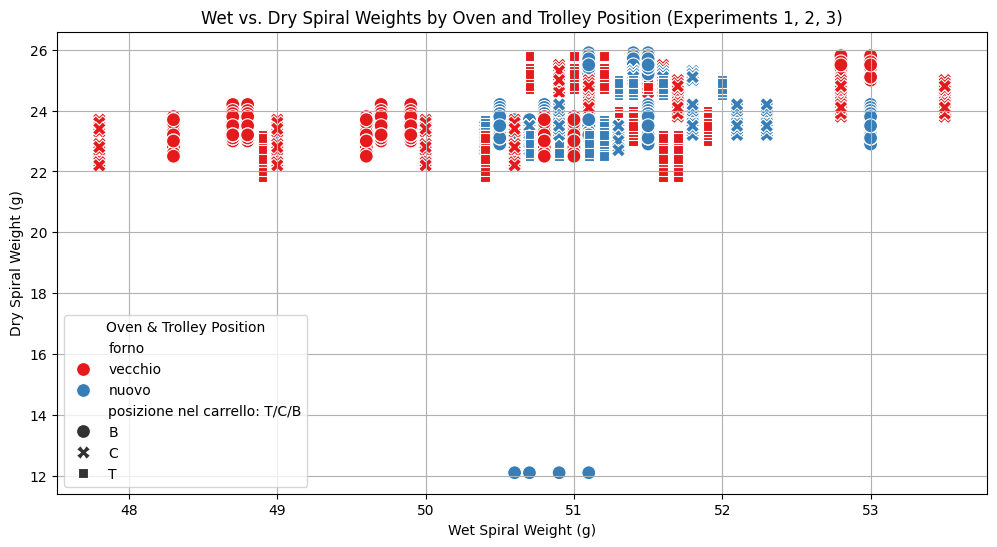


Grouped Statistics with Delta:
    numero di esperimento    forno posizione nel carrello: T/C/B  mean_wet  \
0                       1    nuovo                             B    51.375   
1                       1    nuovo                             C    51.550   
2                       1    nuovo                             T    51.575   
3                       1  vecchio                             B    52.175   
4                       1  vecchio                             C    51.225   
5                       1  vecchio                             T    51.100   
6                       2    nuovo                             B    50.825   
7                       2    nuovo                             C    50.800   
8                       2    nuovo                             T    50.875   
9                       2  vecchio                             B    49.275   
10                      2  vecchio                             C    52.275   
11                      2  vecch

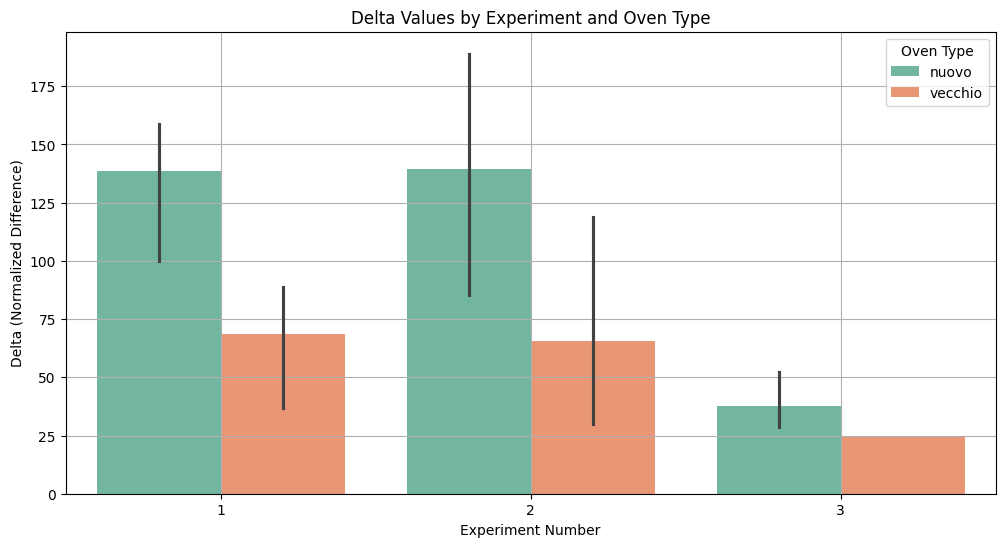

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for experiments 1, 2, and 3
experiments_filtered = data[data['numero di esperimento'].isin([1, 2, 3])]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale umida']]
dry_data = experiments_filtered[['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B', 'peso spirale secca']]

# Drop NaN values
wet_data = wet_data.dropna(subset=['peso spirale umida'])
dry_data = dry_data.dropna(subset=['peso spirale secca'])

# Merge wet and dry weights for paired analysis
merged_data = pd.merge(wet_data, dry_data, on=['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B'], suffixes=('_wet', '_dry'))

# Calculate Delta for each row
merged_data['Delta'] = (merged_data['peso spirale umida'] - merged_data['peso spirale secca']) / merged_data['peso spirale umida'].std()

# Scatter plot of wet vs. dry weights
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_data,
    x='peso spirale umida',
    y='peso spirale secca',
    hue='forno',
    style='posizione nel carrello: T/C/B',
    palette='Set1',
    s=100
)
plt.title("Wet vs. Dry Spiral Weights by Oven and Trolley Position (Experiments 1, 2, 3)")
plt.xlabel("Wet Spiral Weight (g)")
plt.ylabel("Dry Spiral Weight (g)")
plt.legend(title="Oven & Trolley Position")
plt.grid(True)
plt.show()

# Calculate mean, std, and Delta for grouped data
grouped_stats = merged_data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B']).agg(
    mean_wet=('peso spirale umida', 'mean'),
    mean_dry=('peso spirale secca', 'mean'),
    std_wet=('peso spirale umida', 'std')
).reset_index()

grouped_stats['Delta'] = (grouped_stats['mean_wet'] - grouped_stats['mean_dry']) / grouped_stats['std_wet']

# Display grouped stats
print("\nGrouped Statistics with Delta:")
print(grouped_stats)

# Bar plot of Delta values
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_stats,
    x='numero di esperimento',
    y='Delta',
    hue='forno',
    palette='Set2'
)
plt.title("Delta Values by Experiment and Oven Type")
plt.xlabel("Experiment Number")
plt.ylabel("Delta (Normalized Difference)")
plt.legend(title="Oven Type")
plt.grid(True)
plt.show()

**EXPERIMENTS 4,5** DIFFERENT POSITION INSIDE OVEN BUT FIXED LEVEL INSIDE THE TROLLY(CENTER).

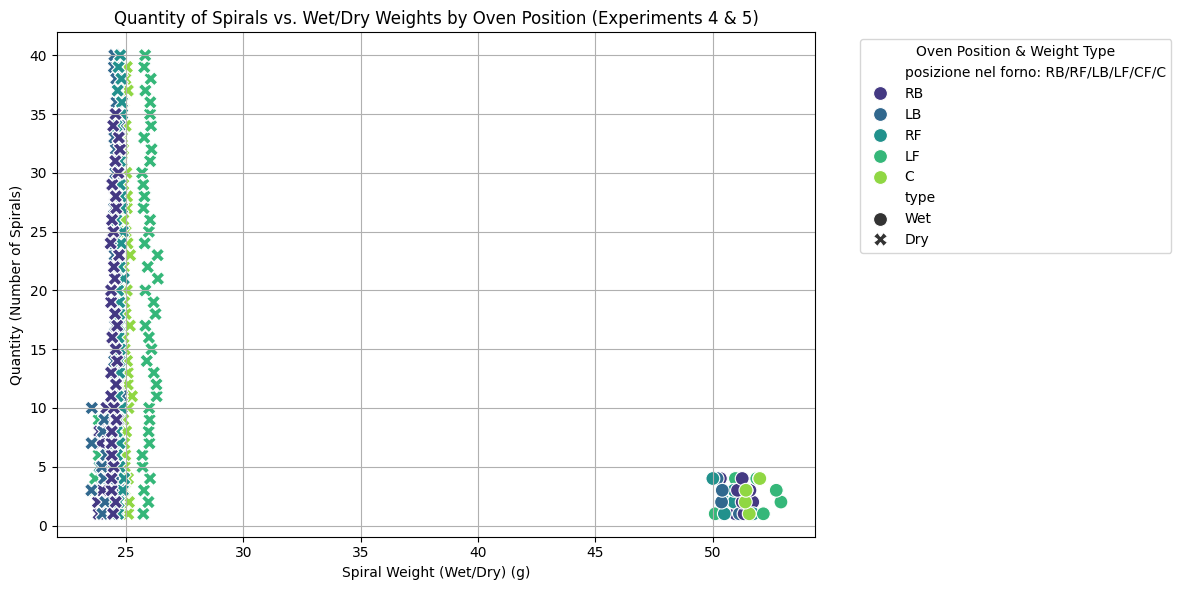

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Experiments 4 and 5, center trolley level, and old oven
experiments_filtered = data[
    (data['numero di esperimento'].isin([4, 5])) &
    (data['posizione nel carrello: T/C/B'] == 'C') &
    (data['forno'] == 'vecchio')
]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C', 'peso spirale umida']].dropna(subset=['peso spirale umida'])
dry_data = experiments_filtered[['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C', 'peso spirale secca']].dropna(subset=['peso spirale secca'])

# Add a "quantity" column to represent spiral count
wet_data['quantity'] = wet_data.groupby(['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C']).cumcount() + 1
dry_data['quantity'] = dry_data.groupby(['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C']).cumcount() + 1

# Add a "type" column to differentiate wet and dry weights
wet_data['type'] = 'Wet'
wet_data = wet_data.rename(columns={'peso spirale umida': 'weight'})
dry_data['type'] = 'Dry'
dry_data = dry_data.rename(columns={'peso spirale secca': 'weight'})

# Combine wet and dry data into one DataFrame for plotting
combined_data = pd.concat([wet_data, dry_data])

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=combined_data,
    x='weight',
    y='quantity',
    hue='posizione nel forno: RB/RF/LB/LF/CF/C',  # Color for oven position
    style='type',  # Marker for wet/dry weights
    palette='viridis',
    s=100
)

# Customize plot
plt.title("Quantity of Spirals vs. Wet/Dry Weights by Oven Position (Experiments 4 & 5)")
plt.xlabel("Spiral Weight (Wet/Dry) (g)")
plt.ylabel("Quantity (Number of Spirals)")
plt.legend(title="Oven Position & Weight Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


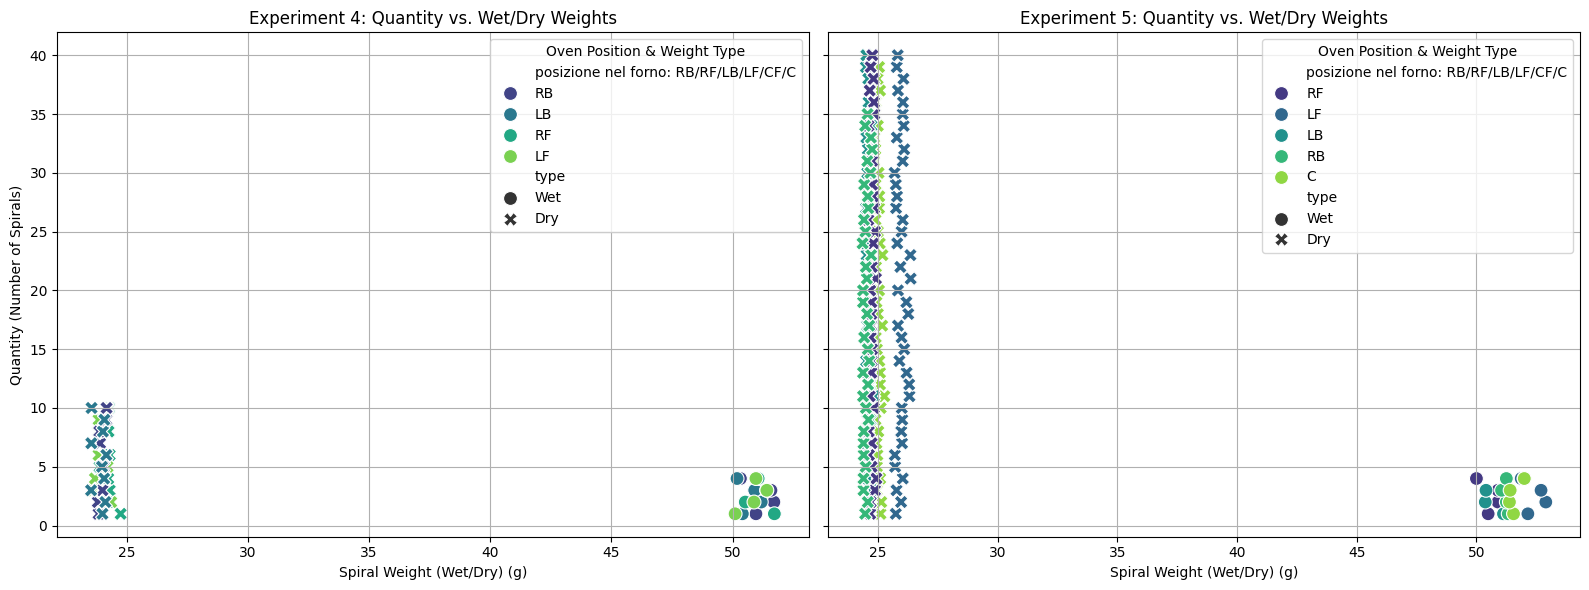

In [17]:

# Create side-by-side scatter plots for Experiments 4 and 5
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Experiment 4
sns.scatterplot(
    data=combined_data[combined_data['numero di esperimento'] == 4],
    x='weight',
    y='quantity',
    hue='posizione nel forno: RB/RF/LB/LF/CF/C',
    style='type',
    palette='viridis',
    s=100,
    ax=axes[0]
)
axes[0].set_title("Experiment 4: Quantity vs. Wet/Dry Weights")
axes[0].set_xlabel("Spiral Weight (Wet/Dry) (g)")
axes[0].set_ylabel("Quantity (Number of Spirals)")
axes[0].legend(title="Oven Position & Weight Type", loc='upper right')
axes[0].grid(True)

# Experiment 5
sns.scatterplot(
    data=combined_data[combined_data['numero di esperimento'] == 5],
    x='weight',
    y='quantity',
    hue='posizione nel forno: RB/RF/LB/LF/CF/C',
    style='type',
    palette='viridis',
    s=100,
    ax=axes[1]
)
axes[1].set_title("Experiment 5: Quantity vs. Wet/Dry Weights")
axes[1].set_xlabel("Spiral Weight (Wet/Dry) (g)")
axes[1].set_ylabel("")  # Omit redundant ylabel
axes[1].legend(title="Oven Position & Weight Type", loc='upper right')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


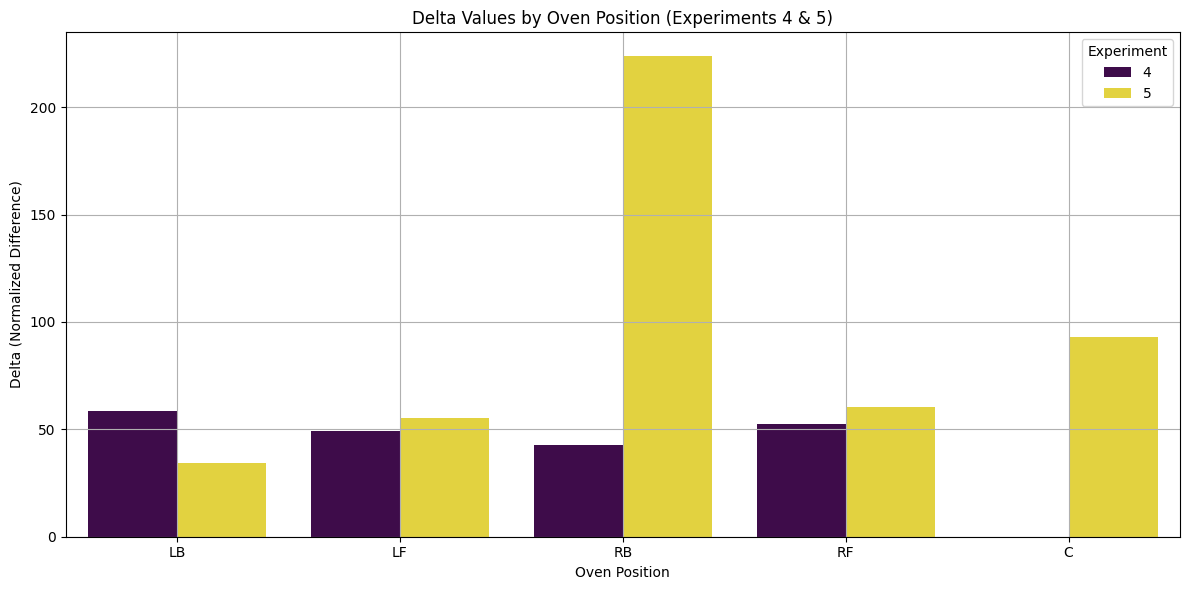


Computed Delta Values:
   numero di esperimento posizione nel forno: RB/RF/LB/LF/CF/C       Delta
0                      4                                    LB   58.369302
1                      4                                    LF   49.438234
2                      4                                    RB   42.695997
3                      4                                    RF   52.480208
4                      5                                     C   92.829831
5                      5                                    LB   34.552494
6                      5                                    LF   55.396128
7                      5                                    RB  223.666472
8                      5                                    RF   60.398882


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Experiments 4 and 5, center trolley level, and old oven
experiments_filtered = data[
    (data['numero di esperimento'].isin([4, 5])) &
    (data['posizione nel carrello: T/C/B'] == 'C') &
    (data['forno'] == 'vecchio')
]

# Separate data for wet and dry spirals
wet_data = experiments_filtered[['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C', 'peso spirale umida']].dropna(subset=['peso spirale umida'])
dry_data = experiments_filtered[['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C', 'peso spirale secca']].dropna(subset=['peso spirale secca'])

# Compute Delta: Mean difference normalized by standard deviation
wet_grouped = wet_data.groupby(['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C']).agg(
    mean_wet=('peso spirale umida', 'mean'),
    std_wet=('peso spirale umida', 'std')
).reset_index()

dry_grouped = dry_data.groupby(['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C']).agg(
    mean_dry=('peso spirale secca', 'mean')
).reset_index()

# Merge wet and dry grouped data
merged_stats = pd.merge(wet_grouped, dry_grouped, on=['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C'])

# Calculate Delta
merged_stats['Delta'] = (merged_stats['mean_wet'] - merged_stats['mean_dry']) / merged_stats['std_wet']

# Bar plot for Delta values
plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged_stats,
    x='posizione nel forno: RB/RF/LB/LF/CF/C',
    y='Delta',
    hue='numero di esperimento',
    palette='viridis'
)
plt.title("Delta Values by Oven Position (Experiments 4 & 5)")
plt.xlabel("Oven Position")
plt.ylabel("Delta (Normalized Difference)")
plt.legend(title="Experiment")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display computed Delta values
print("\nComputed Delta Values:")
print(merged_stats[['numero di esperimento', 'posizione nel forno: RB/RF/LB/LF/CF/C', 'Delta']])


In [19]:
from scipy.stats import f_oneway

# Group Delta values by oven position
groups = [
    merged_stats[merged_stats['posizione nel forno: RB/RF/LB/LF/CF/C'] == pos]['Delta']
    for pos in merged_stats['posizione nel forno: RB/RF/LB/LF/CF/C'].unique()
]

# Perform One-Way ANOVA
anova_result = f_oneway(*groups)

# Display ANOVA results
print("One-Way ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret the result
if anova_result.pvalue < 0.05:
    print("The differences in Delta values between oven positions are statistically significant.")
else:
    print("The differences in Delta values between oven positions are NOT statistically significant.")


One-Way ANOVA Results:
F-statistic: 0.6238
P-value: 0.6706
The differences in Delta values between oven positions are NOT statistically significant.


**THE 6th EXPERIMENT** CHECK WAITING TIME BY WEIGHT WET SPIRALS AFTER STAMP, AFTER 2 HOURS AND AFTER CAMING OUT FROM OVEN

**ETOC**

<ipython-input-32-d1d28b4fe1ec>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


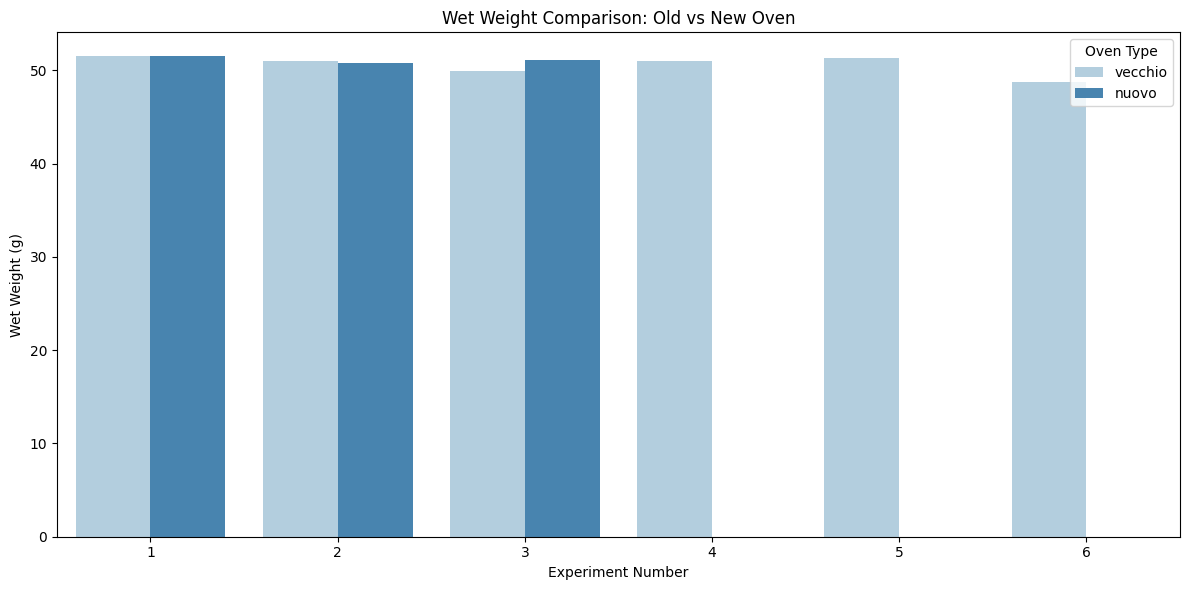

<ipython-input-32-d1d28b4fe1ec>:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


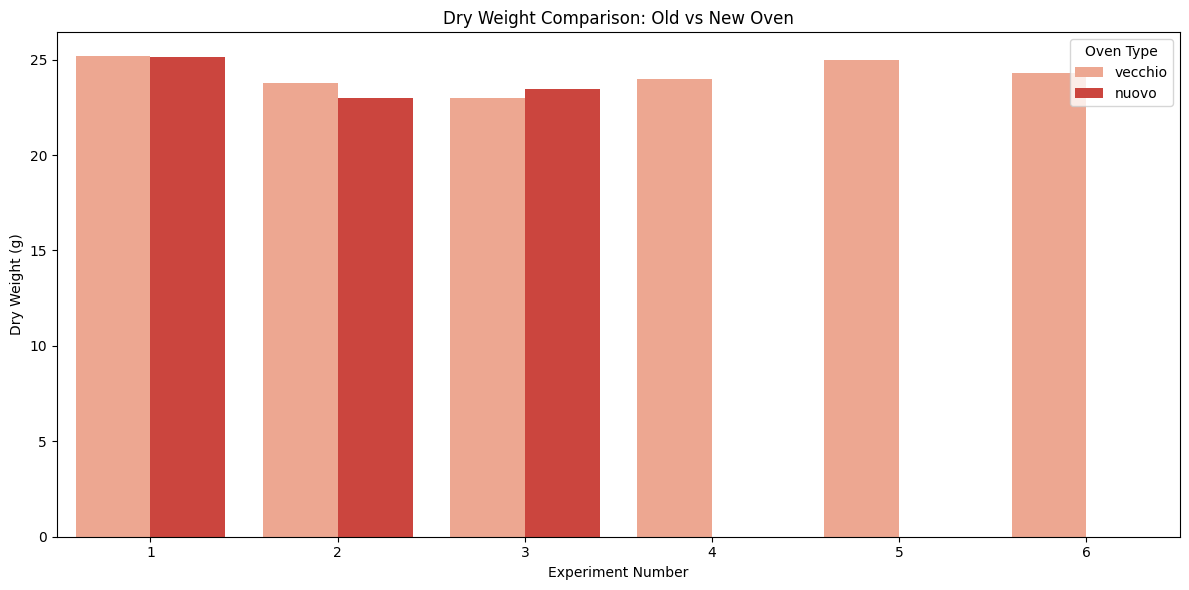

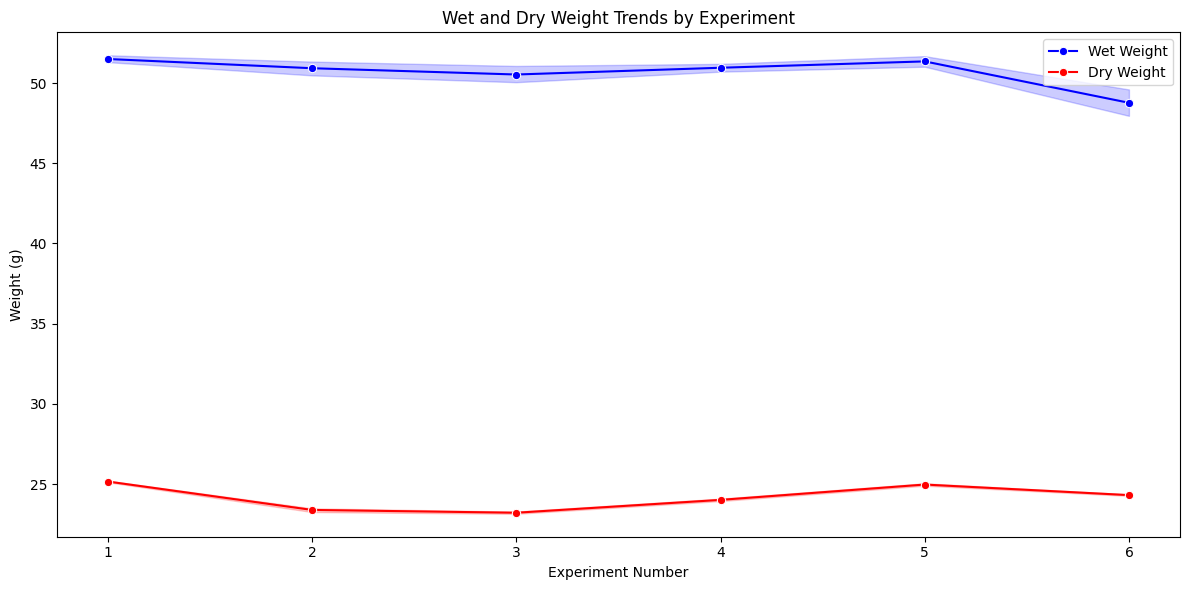

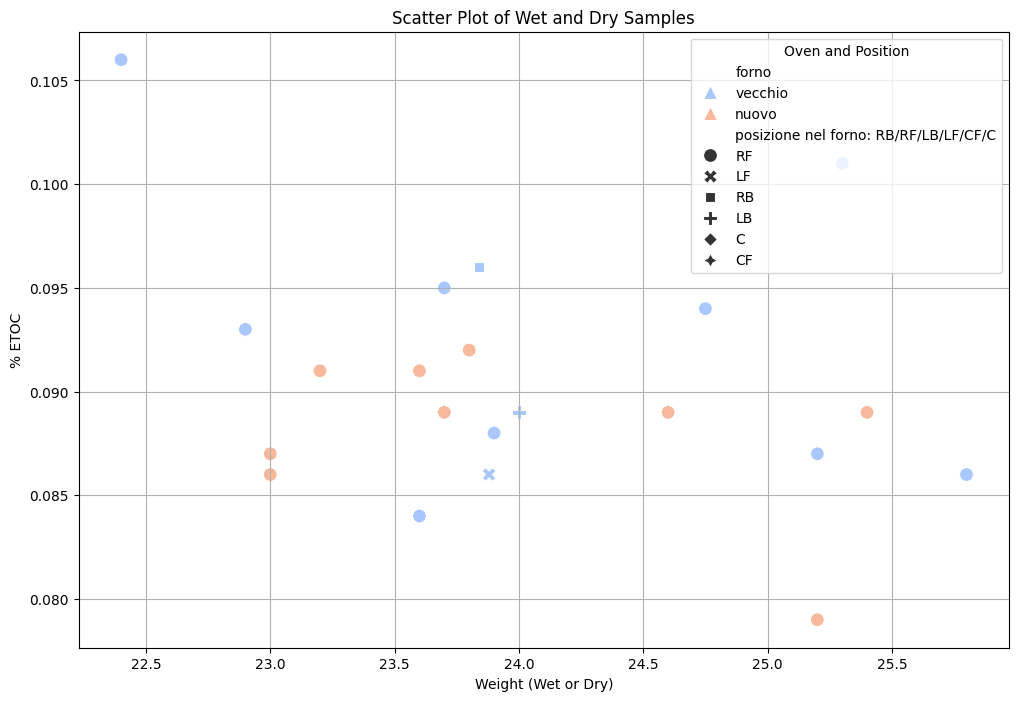

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning: Convert columns to numeric where applicable
data['peso spirale umida'] = pd.to_numeric(data['peso spirale umida'], errors='coerce')
data['peso spirale secca'] = pd.to_numeric(data['peso spirale secca'], errors='coerce')
data['% ETOC'] = pd.to_numeric(data['% ETOC'], errors='coerce')

# Separate Wet and Dry Samples
wet_samples = data[data['peso spirale umida'].notna()]
dry_samples = data[data['peso spirale secca'].notna()]

# Compute Mean and Standard Deviation Separately for Wet and Dry Samples
wet_stats = wet_samples.groupby(['forno', 'numero di esperimento']).agg(
    wet_weight_mean=('peso spirale umida', 'mean'),
    wet_weight_std=('peso spirale umida', 'std')
).reset_index()

dry_stats = dry_samples.groupby(['forno', 'numero di esperimento']).agg(
    dry_weight_mean=('peso spirale secca', 'mean'),
    dry_weight_std=('peso spirale secca', 'std')
).reset_index()

# -------------------------------------------------
# PLOT 1: Wet Weight Comparison (Old vs New Oven)
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=wet_samples,
    x='numero di esperimento', y='peso spirale umida', hue='forno',
    ci=None, palette='Blues'
)
plt.title('Wet Weight Comparison: Old vs New Oven')
plt.xlabel('Experiment Number')
plt.ylabel('Wet Weight (g)')
plt.legend(title='Oven Type')
plt.tight_layout()
plt.savefig("wet_weight_comparison.png")
plt.show()

# -------------------------------------------------
# PLOT 2: Dry Weight Comparison (Old vs New Oven)
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dry_samples,
    x='numero di esperimento', y='peso spirale secca', hue='forno',
    ci=None, palette='Reds'
)
plt.title('Dry Weight Comparison: Old vs New Oven')
plt.xlabel('Experiment Number')
plt.ylabel('Dry Weight (g)')
plt.legend(title='Oven Type')
plt.tight_layout()
plt.savefig("dry_weight_comparison.png")
plt.show()

# -------------------------------------------------
# PLOT 3: Combined Wet and Dry Weight Trends
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=wet_samples,
    x='numero di esperimento', y='peso spirale umida', label='Wet Weight',
    marker='o', color='blue'
)
sns.lineplot(
    data=dry_samples,
    x='numero di esperimento', y='peso spirale secca', label='Dry Weight',
    marker='o', color='red'
)
plt.title('Wet and Dry Weight Trends by Experiment')
plt.xlabel('Experiment Number')
plt.ylabel('Weight (g)')
plt.legend()
plt.tight_layout()
plt.savefig("wet_dry_weight_trends.png")
plt.show()

# -------------------------------------------------
# SCATTER PLOT: % ETOC vs Wet/Dry Weight
# -------------------------------------------------
# Create scatter plots for wet and dry samples
plt.figure(figsize=(12, 8))

# Plot for wet samples
sns.scatterplot(
    data=wet_samples,
    #x='numero di esperimento',
    x='peso spirale secca',
    y='% ETOC',
    hue='forno',
    style='posizione nel forno: RB/RF/LB/LF/CF/C',
    palette='coolwarm',
    s=100
)

# Plot for dry samples
sns.scatterplot(
    data=dry_samples,
    #x='numero di esperimento',
    x='peso spirale secca',
    y='% ETOC',
    hue='forno',
    style='posizione nel forno: RB/RF/LB/LF/CF/C',
    palette='coolwarm',
    s=100,
    marker="^"  # Different marker for distinction
)

# Add plot details
plt.title("Scatter Plot of Wet and Dry Samples")
plt.xlabel("Weight (Wet or Dry)")
plt.ylabel("% ETOC")
plt.legend(title="Oven and Position")
plt.grid(True)
plt.show()

In [ ]:
# Group data by experiment, oven type, trolley position, and oven position
grouped_data = data.groupby(['numero di esperimento', 'forno',
                           'posizione nel carrello: T/C/B', 'posizione nel forno: RB/RF/LB/LF/CF/C'])['% ETOC'].agg(['mean', 'std', 'count']).reset_index()

# Rename columns for clarity
grouped_data.rename(columns={'mean': 'mean_ETOC', 'std': 'std_ETOC', 'count': 'sample_count'}, inplace=True)

# Display grouped summary data
print(grouped_data)

    numero di esperimento    forno posizione nel carrello: T/C/B  \
0                       1    nuovo                             B   
1                       1    nuovo                             C   
2                       1    nuovo                             T   
3                       1  vecchio                             B   
4                       1  vecchio                             C   
5                       1  vecchio                             T   
6                       2    nuovo                             B   
7                       2    nuovo                             C   
8                       2    nuovo                             T   
9                       2  vecchio                             B   
10                      2  vecchio                             C   
11                      2  vecchio                             T   
12                      3    nuovo                             B   
13                      3    nuovo              

In [ ]:
# Group data by experiment, oven type, and trolley position
grouped_data = data.groupby(['numero di esperimento', 'forno', 'posizione nel carrello: T/C/B'])['% ETOC'].agg(['mean', 'std', 'count']).reset_index()

# Rename columns for clarity
grouped_data.rename(columns={'mean': 'mean_ETOC', 'std': 'std_ETOC', 'count': 'sample_count'}, inplace=True)

# Display grouped summary data
print(grouped_data)

    numero di esperimento    forno posizione nel carrello: T/C/B  mean_ETOC  \
0                       1    nuovo                             B    0.08900   
1                       1    nuovo                             C    0.07900   
2                       1    nuovo                             T    0.08900   
3                       1  vecchio                             B    0.08600   
4                       1  vecchio                             C    0.08700   
5                       1  vecchio                             T    0.10100   
6                       2    nuovo                             B    0.09100   
7                       2    nuovo                             C    0.08600   
8                       2    nuovo                             T    0.08700   
9                       2  vecchio                             B    0.09200   
10                      2  vecchio                             C    0.08800   
11                      2  vecchio                  

In [ ]:
print(data_filtered.columns)

Index(['Date', 'number', 'peso spirale umida', 'peso spirale secca',
       'Numero del forno', 'forno', 'posizione nel carrello: T/C/B',
       'posizione nel forno: RB/RF/LB/LF/CF/C', '% ETOC',
       'numero di esperimento', 'numero di carello',
       'orario di tempo di attesa', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Filter data for valid % ETOC values
data_filtered = data.dropna(subset=['% ETOC'])

# Define the corrected formula using Q() for column names
formula = 'Q("% ETOC") ~ forno + Q("posizione nel carrello: T/C/B") + forno:Q("posizione nel forno: RB/RF/LB/LF/CF/C")'

# Perform two-way ANOVA
model = ols(formula, data=data_filtered).fit()
anova_results = anova_lm(model, typ=2)

# Display ANOVA results
print("Two-Way ANOVA Results:")
print(anova_results)

Two-Way ANOVA Results:
                                                    sum_sq    df           F  \
forno                                             0.019752   1.0  620.405098   
Q("posizione nel carrello: T/C/B")                0.000074   2.0    1.157752   
forno:Q("posizione nel forno: RB/RF/LB/LF/CF/C")  0.017374   6.0   90.948879   
Residual                                          0.000478  15.0         NaN   

                                                        PR(>F)  
forno                                             1.285398e-13  
Q("posizione nel carrello: T/C/B")                3.407384e-01  
forno:Q("posizione nel forno: RB/RF/LB/LF/CF/C")  2.492420e-10  
Residual                                                   NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


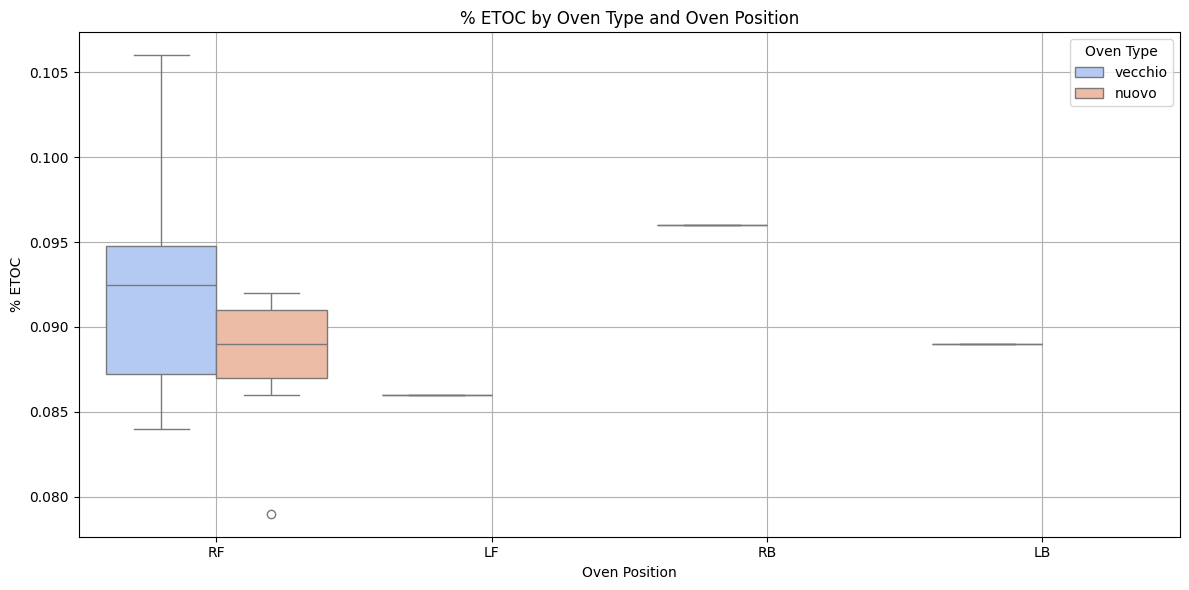

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot showing interaction effects
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data_filtered,
    x='posizione nel forno: RB/RF/LB/LF/CF/C',
    y='% ETOC',
    hue='forno',
    palette='coolwarm'
)
plt.title('% ETOC by Oven Type and Oven Position')
plt.xlabel('Oven Position')
plt.ylabel('% ETOC')
plt.legend(title='Oven Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(data_filtered[['forno', 'posizione nel forno: RB/RF/LB/LF/CF/C', '% ETOC']].head())

       forno posizione nel forno: RB/RF/LB/LF/CF/C  % ETOC
24   vecchio                                    RF   0.101
42   vecchio                                    RF   0.087
76   vecchio                                    RF   0.086
112    nuovo                                    RF   0.089
143    nuovo                                    RF   0.079


In [ ]:
print(data_filtered['posizione nel forno: RB/RF/LB/LF/CF/C'].unique())

['RF' 'LF' 'RB' 'LB']


In [ ]:
print(data_filtered['forno'].dtype)
print(data_filtered['posizione nel forno: RB/RF/LB/LF/CF/C'].dtype)

category
category


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Filter data for valid % ETOC values
data_filtered = data.dropna(subset=['% ETOC'])

# Group by experiment, oven type, and position in oven, calculate mean ETOC
grouped_data = data_filtered.groupby(
    ['numero di esperimento', 'forno', 'posizione nel forno: RB/RF/LB/LF/CF/C']
)['% ETOC'].mean().reset_index()

# Add theoretical ETOC as the maximum ETOC observed across all groups
grouped_data['Theoretical_ETOC'] = grouped_data['% ETOC'].max()

# Calculate the percentage of ETOC lost
grouped_data['Δ% ETOC'] = (
    (grouped_data['Theoretical_ETOC'] - grouped_data['% ETOC']) / grouped_data['Theoretical_ETOC'] * 100
)

# Display grouped data with % ETOC lost
print("Grouped Data with Δ% ETOC:")
print(grouped_data)

# Perform ANOVA to assess the impact of oven type and position on Δ% ETOC
# Filter rows where Δ% ETOC is not NaN
anova_data = grouped_data.dropna(subset=['Δ% ETOC'])

# Define formula for ANOVA
formula = 'Q("Δ% ETOC") ~ forno + Q("posizione nel forno: RB/RF/LB/LF/CF/C") + forno:Q("posizione nel forno: RB/RF/LB/LF/CF/C")'

# Perform ANOVA
model = ols(formula, data=anova_data).fit()
anova_results = anova_lm(model, typ=2)

# Display ANOVA results
print("\nTwo-Way ANOVA Results for Δ% ETOC:")
print(anova_results)

Grouped Data with Δ% ETOC:
   numero di esperimento    forno posizione nel forno: RB/RF/LB/LF/CF/C  \
0                      1    nuovo                                    RF   
1                      1  vecchio                                    RF   
2                      2    nuovo                                    RF   
3                      2  vecchio                                    RF   
4                      3    nuovo                                    RF   
5                      3  vecchio                                    RF   
6                      4  vecchio                                    LB   
7                      4  vecchio                                    LF   
8                      4  vecchio                                    RB   
9                      4  vecchio                                    RF   

     % ETOC  Theoretical_ETOC    Δ% ETOC  
0  0.085667             0.098  12.585034  
1  0.091333             0.098   6.802721  
2  0.088000       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '


1. Grouped Data with Δ% ETOC
This table summarizes the results of grouping and computing the percentage of ETOC lost (Δ% ETOC) for each combination of:

Experiment (numero di esperimento)
Oven type (forno)
Position within the oven (posizione nel forno: RB/RF/LB/LF/CF/C)
Key observations:

The Theoretical ETOC (maximum observed ETOC across all groups) is 0.098.
The Δ% ETOC represents the percentage of ETOC lost relative to the theoretical ETOC.
For example:

For experiment 1 (numero di esperimento = 1) in a new oven (nuovo) at position RF, the mean ETOC is 0.085667. The percentage of ETOC lost is:
Δ
%
ETOC
=
0.098
−
0.085667
0.098
×
100
=
12.59
%
Δ%ETOC=
0.098
0.098−0.085667
​
 ×100=12.59%
For the same experiment in an old oven (vecchio) at position RF, the mean ETOC is 0.091333, and the percentage of ETOC lost is 6.80%.
This gives an idea of how ETOC retention varies between oven types and positions.

2. Two-Way ANOVA Results for Δ% ETOC
The ANOVA analysis examines the effects of:

Oven type (forno).
Position in the oven (posizione nel forno: RB/RF/LB/LF/CF/C).
Interaction between oven type and position.
Key results:

Oven type (forno):

The F-statistic = 0.371814
The p-value = 0.568662 (greater than 0.05), meaning the effect of oven type on Δ% ETOC is not statistically significant.
Position in the oven (posizione nel forno: RB/RF/LB/LF/CF/C):

The F-statistic = 4.281773
The p-value = 0.093329 (greater than 0.05), meaning the position in the oven has a marginally non-significant effect on Δ% ETOC.
Interaction (forno:posizione nel forno):

The F-statistic = 3.296043
The p-value = 0.115965 (greater than 0.05), indicating the interaction effect is also not statistically significant.
Key Insights
No significant effect of oven type (old vs. new):

The oven type alone does not have a statistically significant effect on the percentage of ETOC lost.
Position has a potential (marginal) impact:

While the position in the oven has a noticeable impact (p = 0.093329), it is not statistically significant at the typical 0.05 level. This may suggest variability due to positioning.
No significant interaction:

The combination of oven type and position does not have a significant effect on Δ% ETOC.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Calculate the theoretical ETOC
theoretical_etoc = 0.098  # Assuming a constant value

# Calculate Δ% ETOC for each row where % ETOC is not NaN
data_filtered['Δ% ETOC'] = (theoretical_etoc - data_filtered['% ETOC']) / theoretical_etoc * 100

# Filter data for new and old ovens
new_oven_data = data_filtered[data_filtered['forno'] == 'nuovo']['Δ% ETOC']
old_oven_data = data_filtered[data_filtered['forno'] == 'vecchio']['Δ% ETOC']

# Drop NaN values from both groups
new_oven_data = new_oven_data.dropna()
old_oven_data = old_oven_data.dropna()

# Perform t-test to compare ETOC loss between new and old ovens
t_stat, p_value = ttest_ind(new_oven_data, old_oven_data, equal_var=False)

# Display results
print("New Oven Mean Δ% ETOC:", new_oven_data.mean())
print("Old Oven Mean Δ% ETOC:", old_oven_data.mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a statistically significant difference in ETOC loss between new and old ovens.")
else:
    print("No statistically significant difference in ETOC loss between new and old ovens.")

New Oven Mean Δ% ETOC: 10.090702947845813
Old Oven Mean Δ% ETOC: 6.043956043956049
T-statistic: 1.7977171872602082
P-value: 0.08749028036668524
No statistically significant difference in ETOC loss between new and old ovens.


<ipython-input-48-258475bce47d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Δ% ETOC'] = (theoretical_etoc - data_filtered['% ETOC']) / theoretical_etoc * 100


1. Calculate Δ% ETOC:
The formula for Δ% ETOC is calculated as:

Δ%𝐸𝑇𝑂𝐶=
Theoretical ETOC - Actual ETOC / Theoretical ETOC * 100

This calculates the percentage loss for each observation.


2. Perform T-Test:
A two-sample t-test (ttest_ind) is performed to check if the mean Δ% ETOC is significantly different between the two groups.

3. Interpret Results:
If the p-value is less than 0.05, we conclude a significant difference between the ETOC loss for new and old ovens.








T-Statistic:

The t-statistic is a measure of the difference between the means of two groups, relative to the variation in the data.

It quantifies how many standard errors the difference in means is away from 0.

Interpretation:

A large t-statistic indicates that the difference between the means is much greater than the variability within the data.

A small t-statistic indicates that the difference between the means is small relative to the variability.

P-Value:

The p-value tells you how likely it is to observe the data (or something more extreme) if the null hypothesis is true.

Null Hypothesis (𝐻0):
There is no difference in ETOC loss between the new and old ovens.

The smaller the p-value, the stronger the evidence against the null hypothesis.

Threshold for Significance:

If 𝑝 < 0.05 :
The result is statistically significant, and we reject the null hypothesis.

If 𝑝 ≥ 0.05:
The result is not statistically significant, and we fail to reject the null hypothesis.

T-tests and p-values are used to assess whether observed differences are due to random chance or whether they reflect a true difference in the population. In this case:

The t-test compares the mean percentage loss of ETOC (Δ%𝐸𝑇𝑂𝐶) between the "new" and "old" ovens.
The p-value quantifies the probability of observing the difference between the two groups if, in reality, there is no difference.
